In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
iris=load_iris() 

In [4]:
data=iris.data

In [5]:
column=iris.feature_names

In [6]:
df=pd.DataFrame(data=data, columns=column)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
# Correlations (relation between data sets)
# 1 => Perfectly positive relationship (if one increase other will also increase)
# -1 => Perfectly negative relationship (if one decrease other will also decrease)

df.corr()

# as petal length and petal width seems much correlated thats why we choose that

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [82]:
# Features
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: title={'center': 'Scatter Plot'}, xlabel='petal length (cm)', ylabel='petal width (cm)'>

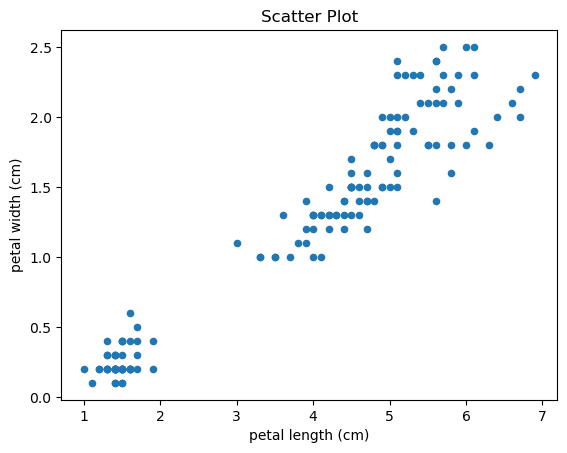

In [83]:
df.plot.scatter(y='petal width (cm)', x='petal length (cm)', title='Scatter Plot')

**Preprocessing**

In [84]:
X= df['petal length (cm)'].values.reshape(-1, 1)
y= df['petal width (cm)'].values.reshape(-1, 1)
# this is because linear regression expects to give a 2-D input

**Train-Test Split**

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
# test_size=0.2 means 80% of data is going to be used for training and 20% for testing

In [87]:
#X_train, y_train

**Training model**

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
regression=LinearRegression()

In [90]:
regression.fit(X_train, y_train)

LinearRegression()

In [91]:
regression.intercept_

array([-0.36430659])

In [92]:
regression.coef_
# slope

array([[0.41716387]])

**Predictions**

In [106]:
# Using Library
pred=regression.predict([[7.5]])
pred

# Petal width=2.5 => Petal length= score

array([[2.76442242]])

In [94]:
# Using function
def calc(slope, intercept, value):
    return intercept+ slope*value

In [107]:
fpred=calc(regression.coef_, regression.intercept_, 7.5)
fpred

array([[2.76442242]])

In [96]:
y_predict=regression.predict(X_test)

In [97]:
df_pred=pd.DataFrame({'Actual': y_test.squeeze(),
                      'Predicted': y_predict.squeeze()})
df_pred

,Actual,Predicted
0,2.1,2.013527
1,2.2,2.430691
2,1.4,1.471214
3,0.2,0.261439
4,1.6,1.763229
5,1.3,1.304349
6,0.2,0.261439
7,1.5,1.554647
8,1.0,1.179200
9,2.5,2.138677


**Evaluating the Model**

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
mae_percent=(mean_absolute_error(y_test, y_predict))*100
mae_percent

14.154495149788387

In [100]:
mse_percent=(mean_squared_error(y_test, y_predict))*100
mse_percent

3.470559992511277

In [101]:
rmse_percent=(np.sqrt(mse_percent/100))*100
rmse_percent

18.62943904821419

**Plotting**

In [102]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


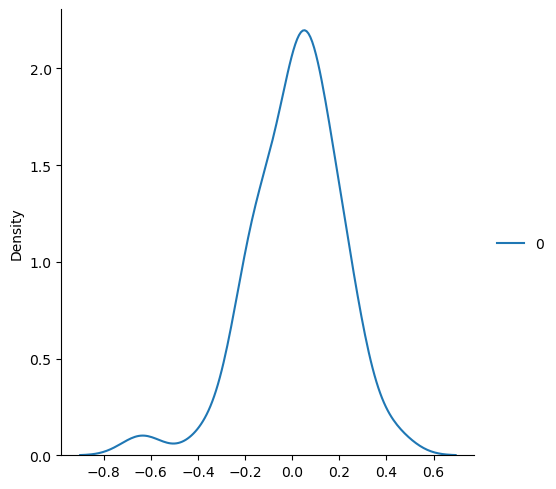

In [103]:
sns.displot(y_predict - y_test, kind='kde')

**Performance Matrix**

In [104]:
from sklearn.metrics import r2_score

In [105]:
R2_percent=(r2_score(y_predict, y_test))*100
R2_percent

93.10763226224834